In [73]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [74]:
month = 'April'

In [75]:
# Read original CSV data
filename = "E:/Work/DS/Programming/vehicle_" + month +".csv"
#filename = "E:/Work/DS/Programming/vehicle.csv"
vehicledf = pd.read_csv(filename)

In [76]:
GATENAME = {5: 'วิศวกรรมศาสตร์',
 30: 'แยก อมช',
 34: 'แยกบริหาร',
 4: 'เกษตรศาสตร์',
 33: 'วงเวียนหอนาฬิกา',
 1: 'หน้ามหาวิทยาลัย',
 27: 'วงเวียนสนามเทนนิส',
 25: 'วงเวียนมนุษย์',
 32: 'แยกโรงอาหารใหม่',
 41: 'สวนดอกพาร์ค',
 23: 'วงเวียน SCB',
 24: 'วงเวียนอ่างตาดชมพู',
 36: 'วิศวกรรมศาสตร์ใหม่',
 3: 'คันคลองชลประทาน',
 22: 'แยกอ่างแก้ว',
 26: 'แยกประตูไผ่ล้อม',
 2: 'ไผ่ล้อม',
 29: 'ลานจอดรถ อมช',
 31: 'ลานจอดรถฝายหิน',
 42: 'POC-ENG-in',
 20: 'แยกตึกอธิการบดี',
 18: 'ศึกษาศาสตร์',
 38: 'ลานจอดรถ  S1',
 19: 'ปตท.ใหม่',
 35: 'ลานจอดรถไร่ฟอร์ด',
 28: 'ลานจอดรถหอ 40 ปี',
 21: 'ลานจอดรถหน้ามอ',
 40: 'จอดรถโรงอาหารกลาง',
 37: 'อาคารสำนักงาน 3',
 39: 'ข่วงพยอม'}

In [77]:
vehicledf.head()

,Unnamed: 0,plate_number,type,is_registered,direction,gate_id,month,day,hour,min,sec
0,23614476,กต2929,car,False,o,34,April,1,0,55,4
1,23615077,ขม6772,car,False,o,27,April,1,0,55,10
2,23615479,งน2300,car,False,o,34,April,1,0,55,14
3,23615645,กฉ8076,car,False,o,33,April,1,1,20,29
4,23615723,ชษ9468,car,False,o,33,April,1,1,20,38


# Data Cleaning and Encoding

Get rid of some unnecessary columns and encode features:

In [78]:
def clean(df):
    return df.drop(columns = ['Unnamed: 0','month'])
def encode(df):
    df['plate_number'] = df['plate_number'].astype('category').cat.codes
    #df['type'] = df['type'].astype('category').cat.codes # 0 as car 1 as motorcycle
    #df['is_registered'] = df['is_registered'].astype('category').cat.codes # 0 as false 1 as true
    #df['direction'] = df['direction'].astype('category').cat.codes # 0 as i 1 as o


In [79]:
df = clean(vehicledf)
encode(df)

In [80]:
df.head()

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,125184,car,False,o,34,1,0,55,4
1,165466,car,False,o,27,1,0,55,10
2,194407,car,False,o,34,1,0,55,14
3,124115,car,False,o,33,1,1,20,29
4,230562,car,False,o,33,1,1,20,38


# Feature Transformation

Get only the information at main gates:

In [81]:
gatemask = True

In [82]:
gatedic = {19: 'PTT',
 4: 'Agriculture',
 1: 'Main Gate',
 3: 'Irrigation Canal',
 36: 'New Engineer Gate',
 5: 'Engineer Gate',
 2: 'Phai Lom',
 18: 'Satit Gate'}

if gatemask:
    entrance_mask = [19,3,4,1,36,5,2,18,42]
    df2 = df[df['gate_id'].isin(entrance_mask)]

Don't care what time of the day the vehicle get in or out, count only the numbers of time they do.

In [83]:
df2.head()

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
6,978,car,False,i,2,1,6,4,19
7,730,car,False,i,2,1,6,4,28
9,977,car,False,i,2,1,6,4,32
10,976,car,False,i,2,1,6,4,37
11,977,car,False,i,2,1,6,42,57


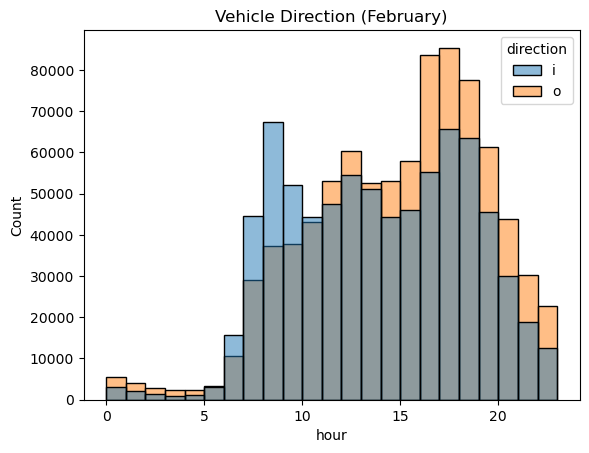

In [84]:
sns.histplot(data = df2, x = 'hour', binwidth=1, hue = 'direction')
plt.title('Vehicle Direction (February)')
plt.show()

In [85]:
df3 = df2.sort_values(['plate_number','day', 'hour', 'min', 'sec'])

In [86]:
df3

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
1128619,1,car,False,i,4,8,13,37,41
3869077,5,motorcycle,False,o,3,28,16,14,7
2758981,9,motorcycle,False,i,1,21,14,57,10
1555296,22,car,False,o,1,11,9,7,12
3684357,22,car,False,i,1,27,16,14,0
...,...,...,...,...,...,...,...,...,...
2917764,260456,car,False,i,1,22,18,17,24
2918441,260456,car,False,o,3,22,18,21,56
3799618,260458,car,False,i,3,28,10,14,49
3830355,260459,car,False,o,3,28,12,55,16


In [87]:
enterdf = df3.loc[(df3['plate_number'].shift(-1)==df3['plate_number'])&(df3['direction'] == 'i')&(df3['direction'].shift(-1) == 'o')].reset_index()
enterdf['gate_id'] = enterdf['gate_id'].map(gatedic)
enterdf.head()

,index,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,1792243,42,motorcycle,False,i,Main Gate,12,12,55,20
1,1699121,47,car,False,i,Main Gate,12,9,12,12
2,2753812,82,car,False,i,Main Gate,21,14,27,45
3,73667,92,motorcycle,False,i,Main Gate,1,13,27,47
4,3530191,92,motorcycle,False,i,Irrigation Canal,26,17,31,29


In [88]:
exitdf = df3.loc[(df3['plate_number'].shift(1)==df3['plate_number'])&(df3['direction'].shift(1) == 'i')&(df3['direction'] == 'o')].reset_index()
exitdf['gate_id'] = exitdf['gate_id'].map(gatedic)
exitdf.head()

,index,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,1748709,42,motorcycle,False,o,Agriculture,12,16,6,36
1,1816934,47,car,False,o,Main Gate,12,15,19,24
2,3834103,82,car,False,o,Irrigation Canal,28,13,12,14
3,1617953,92,motorcycle,False,o,Irrigation Canal,11,16,1,15
4,3807448,92,motorcycle,False,o,Irrigation Canal,28,10,59,48


In [89]:
entrydf = enterdf.loc[:,['plate_number','type','is_registered','day','hour','min','sec']]
entrydf['gate_in'] = enterdf.loc[:,'gate_id']
entrydf['gate_out'] = exitdf.loc[:,'gate_id']

In [90]:
A = enterdf[['day','hour','min','sec']]
B = exitdf[['day','hour','min','sec']]
diff = B-A

In [91]:
entrydf['timediff'] = diff['day']*24 + diff['hour']+ diff['min']/60 + diff['sec']/3600
entrydf['timediff_s'] = diff['day']*24*3600 + diff['hour']*3600+ diff['min']*60 + diff['sec']

In [92]:
filtered_entrydf = entrydf[entrydf['timediff'] > 0]

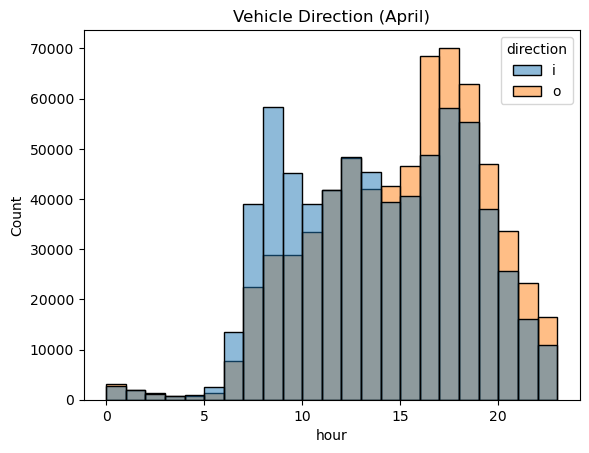

In [93]:
sns.histplot(data = pd.concat([enterdf,exitdf],axis = 0), x = 'hour', binwidth=1, hue = 'direction')
plt.title('Vehicle Direction (April)')
plt.show()

[]

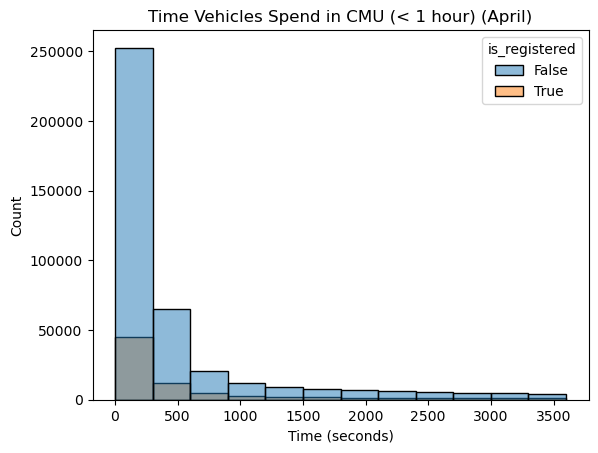

In [94]:
sns.histplot(data = filtered_entrydf[(filtered_entrydf['timediff'] < 1)], x = 'timediff_s',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU (< 1 hour) (April)')
plt.xlabel('Time (seconds)')
plt.plot()

[]

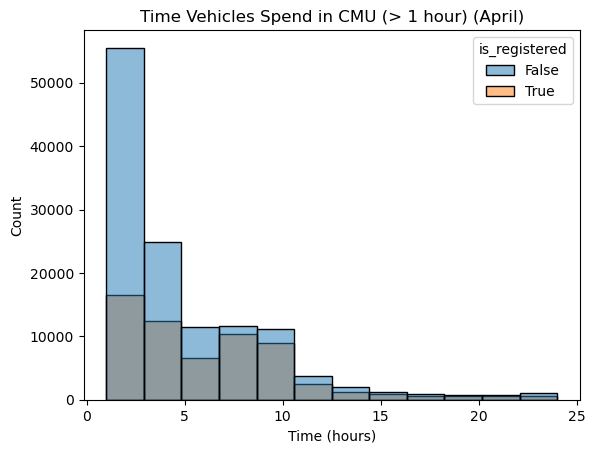

In [95]:
sns.histplot(data = filtered_entrydf[(filtered_entrydf['timediff'] > 1) & (filtered_entrydf['timediff'] < 24)], x = 'timediff',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU (> 1 hour) (April)')
plt.xlabel('Time (hours)')
plt.plot()

[]

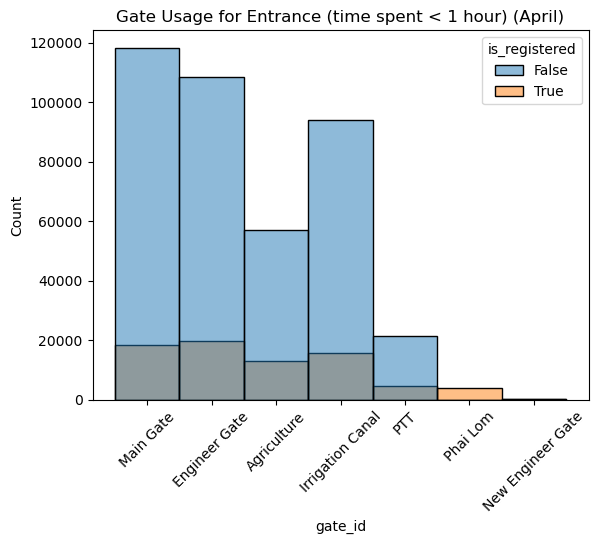

In [96]:
plot = sns.histplot(data = enterdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Entrance (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

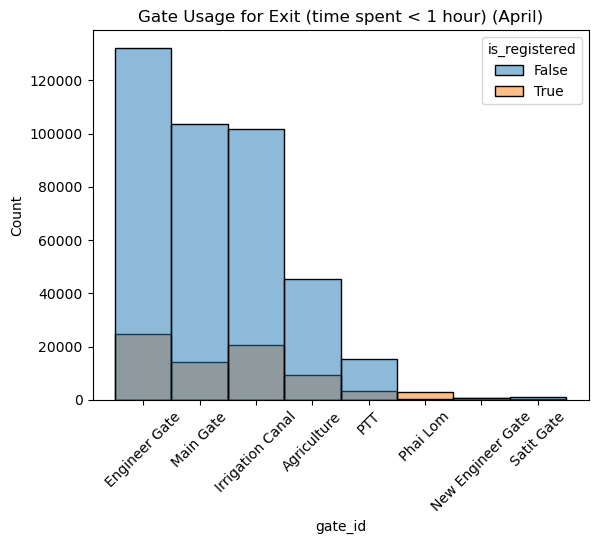

In [97]:
plot = sns.histplot(data = exitdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Exit (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

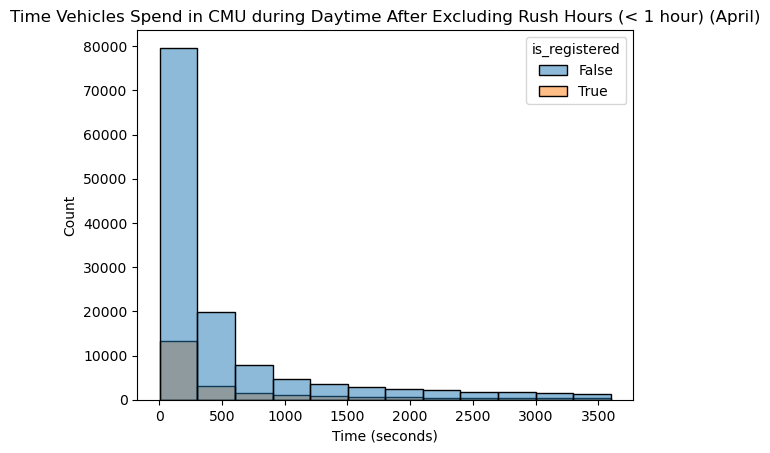

In [98]:
sns.histplot(data = entrydf[(entrydf['timediff'] < 1)&(entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'timediff_s',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU during Daytime After Excluding Rush Hours (< 1 hour) (April)')
plt.xlabel('Time (seconds)')
plt.plot()

[]

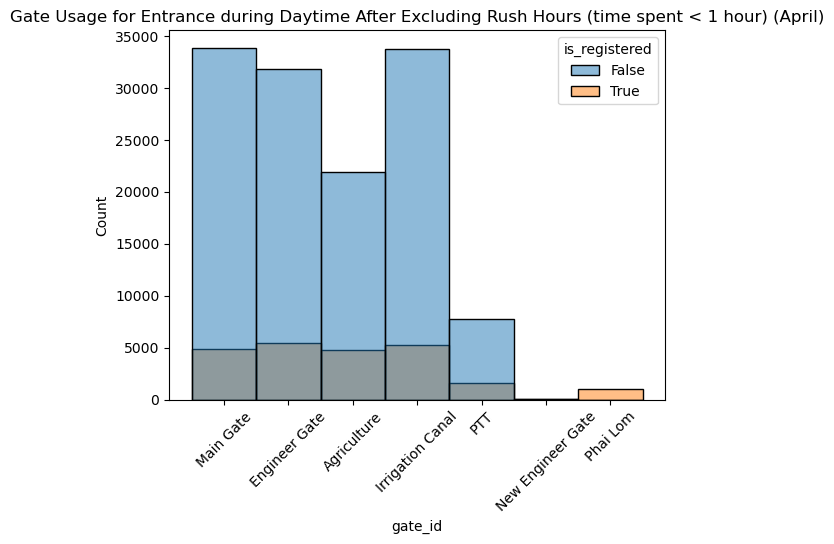

In [99]:
plot = sns.histplot(data = enterdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Entrance during Daytime After Excluding Rush Hours (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

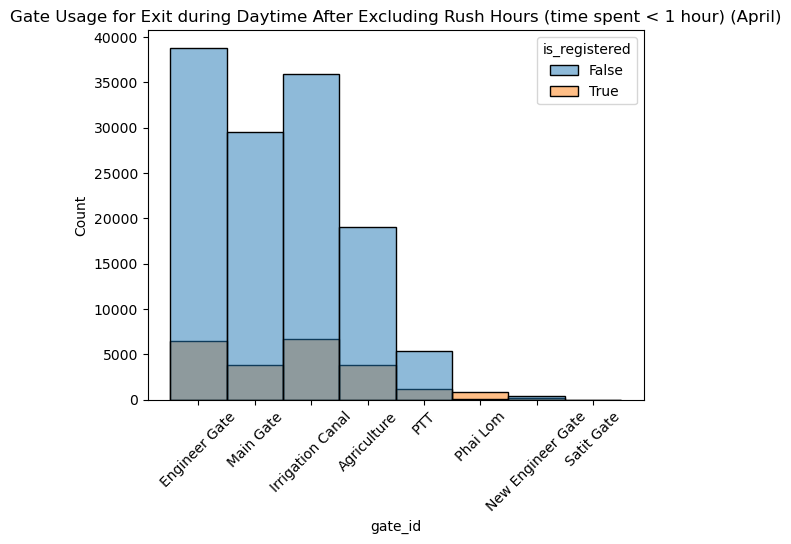

In [100]:
plot = sns.histplot(data = exitdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Exit during Daytime After Excluding Rush Hours (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()